# Probabilistic Automata

## Geração de sinais com automatas probabilísticos

In [203]:
import numpy as np 
import matplotlib.pyplot as plt

### Algoritmo de Monte Carlo para gerar um sorteio aleatório de um elementoentre n tipos diferentes com n probabilidades distintas.

In [432]:
def mc_sample(fp):
    # sortei uma amostra aleatória de tamanho 1 de uma variável aleatória com distribuição uniforme
    s = np.random.uniform()
    # probabilidade acumulada das regiões
    F = fp[0]
    i = 0
    while s > F:
        if i+1 >= len(fp):
            break
        i+=1
        F+=fp[i]
    return i

In [462]:
def p_automata(pm, pi, n, stop = -1):
    signal = []
    
    fp = pm.dot(pi)
    
    for i in range(n):
        move_to = mc_sample(fp)
        signal.append(move_to)
        fp = pm.dot(fp)
    return signal

In [465]:
pm = np.array([[0.3,0.2,0.25,0.4],[0.2,0.3,0.25,0.05],[0.3,0.2,0.3,0.25], [0.2,0.3,0.2,0.3]])
pi = np.array([0.15,0.5,0.2,0.15])

In [475]:
signal = p_automata(pm, pi, 1000)

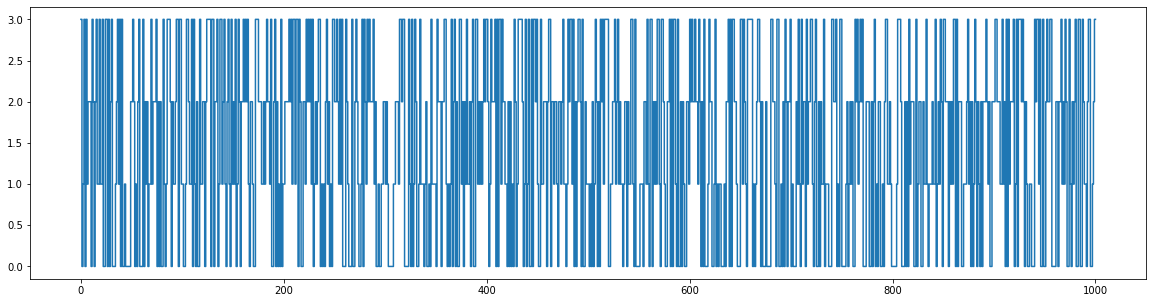

In [482]:
graph_data_x = []
graph_data_y = []
for i in range(len(signal)):
    graph_data_x.append(i)
    graph_data_x.append((i + 1))
    graph_data_y.append(signal[i])
    graph_data_y.append(signal[i])
plt.figure(figsize=(20,5))
plt.plot(graph_data_x, graph_data_y)